In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
#import lightgbm as lgb

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
#from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [4]:
# Code starts here

train = pd.read_csv('E:/GreyAtom/glab proj/Forest Type Cover Prediction/train.csv')
train.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2524,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,13295,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,4312,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,10656,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,868,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [5]:
train.shape

(9072, 56)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9072 entries, 0 to 9071
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  9072 non-null   int64
 1   Elevation                           9072 non-null   int64
 2   Aspect                              9072 non-null   int64
 3   Slope                               9072 non-null   int64
 4   Horizontal_Distance_To_Hydrology    9072 non-null   int64
 5   Vertical_Distance_To_Hydrology      9072 non-null   int64
 6   Horizontal_Distance_To_Roadways     9072 non-null   int64
 7   Hillshade_9am                       9072 non-null   int64
 8   Hillshade_Noon                      9072 non-null   int64
 9   Hillshade_3pm                       9072 non-null   int64
 10  Horizontal_Distance_To_Fire_Points  9072 non-null   int64
 11  Wilderness_Area1                    9072 non-null   int64
 12  Wilder

In [7]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.0,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000,9072.000000,9072.000000,9072.0,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.000000,9072.00000
mean,7535.450838,2749.531415,156.480930,16.529872,226.781966,51.213624,1717.954806,212.691027,219.030423,135.119378,1520.420525,0.239528,0.032959,0.420084,0.307429,0.025022,0.040675,0.061728,0.055004,0.010913,0.045635,0.0,0.000110,0.000551,0.138117,0.026675,0.01455,0.033069,0.011243,0.0,0.007716,0.040344,0.004740,0.003086,0.009700,0.001102,0.022707,0.049824,0.015322,0.000110,0.003968,0.000882,0.000551,0.086530,0.048721,0.020944,0.045635,0.041005,0.001653,0.006834,0.000551,0.002425,0.048391,0.044312,0.029652,4.00000
std,4369.975238,417.236330,109.411024,8.495603,208.875071,61.621329,1322.812625,30.720175,22.885044,46.225735,1121.444963,0.426819,0.178538,0.493599,0.461454,0.156201,0.197546,0.240675,0.228001,0.103898,0.208704,0.0,0.010499,0.023471,0.345042,0.161142,0.11975,0.178826,0.105443,0.0,0.087506,0.196775,0.068687,0.055473,0.098016,0.033184,0.148977,0.217592,0.122836,0.010499,0.062872,0.029684,0.023471,0.281161,0.215297,0.143203,0.208704,0.198313,0.040631,0.082391,0.023471,0.049188,0.214602,0.205799,0.169634,2.00011
min,1.000000,1863.000000,0.000000,0.000000,0.000000,-123.000000,0.000000,0.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,3739.500000,2375.750000,65.000000,10.000000,67.000000,5.000000,765.000000,196.000000,207.000000,106.000000,730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
50%,7551.500000,2755.000000,125.000000,15.000000,180.000000,32.000000,1321.000000,220.000000,223.000000,138.000000,1252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00000
75%,11325

In [9]:
#Drop ID
train.drop('Id', axis=1, inplace=True)
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


Text(0, 0.5, 'Distribution')

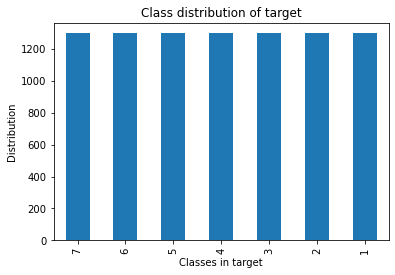

In [12]:
#Checking for class distribution of target
train['Cover_Type'].value_counts().plot(kind='bar')
plt.title('Class distribution of target')
plt.xlabel('Classes in target')
plt.ylabel('Distribution')

In [13]:
#Checking for skewness
train.skew()

Elevation                              0.071829
Aspect                                 0.453036
Slope                                  0.536479
Horizontal_Distance_To_Hydrology       1.469340
Vertical_Distance_To_Hydrology         1.530355
Horizontal_Distance_To_Roadways        1.248358
Hillshade_9am                         -1.115988
Hillshade_Noon                        -0.961365
Hillshade_3pm                         -0.332192
Horizontal_Distance_To_Fire_Points     1.647477
Wilderness_Area1                       1.220795
Wilderness_Area2                       5.232999
Wilderness_Area3                       0.323882
Wilderness_Area4                       0.834809
Soil_Type1                             6.082981
Soil_Type2                             4.651335
Soil_Type3                             3.642825
Soil_Type4                             3.904306
Soil_Type5                             9.416832
Soil_Type6                             4.355127
Soil_Type7                             0

### EDA & Data Preprocessing

- The target is the only categorical feature consisting of 7 classes and all the other features are continuous. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots. 

In [14]:
# Code starts here

#Dropping the columns Soil_Type7 and Soil_type15 as their skewness is zero
train.drop(['Soil_Type7','Soil_Type15'], axis=1, inplace=True)
train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2744,96,17,30,-7,458,245,214,92,351,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5
1,2504,103,8,30,6,404,234,230,127,1510,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
2,2311,30,7,0,0,1230,218,226,143,150,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
3,2710,191,26,443,-45,1209,210,249,158,939,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,2802,91,11,540,18,1699,237,223,115,1084,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


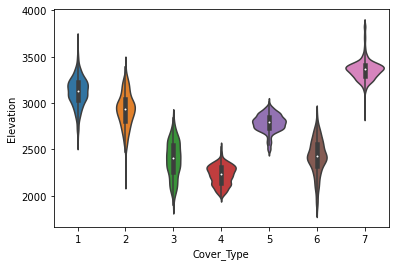

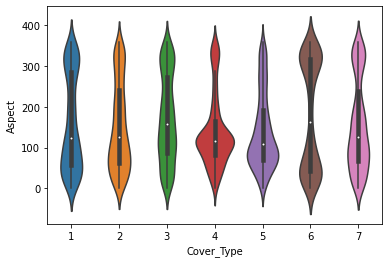

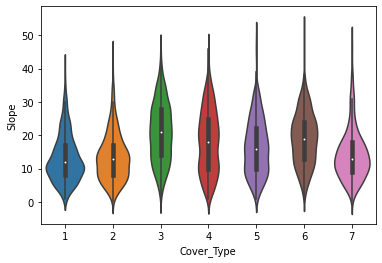

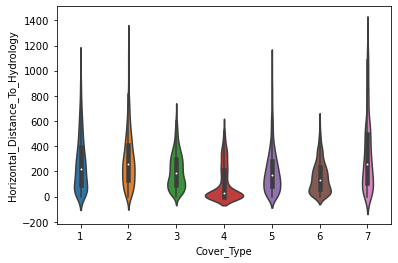

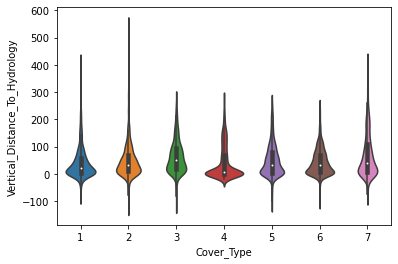

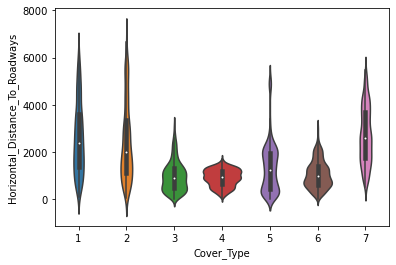

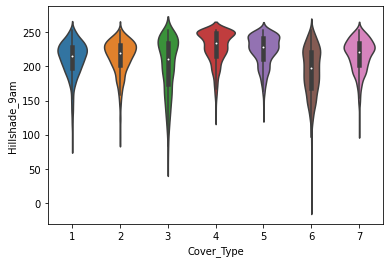

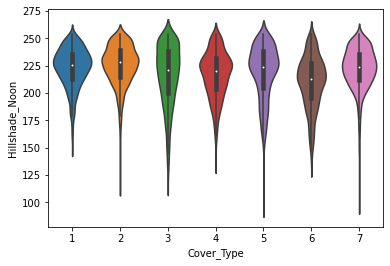

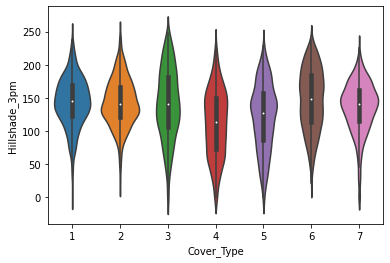

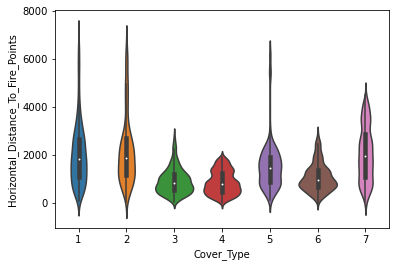

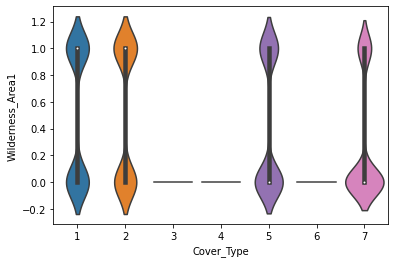

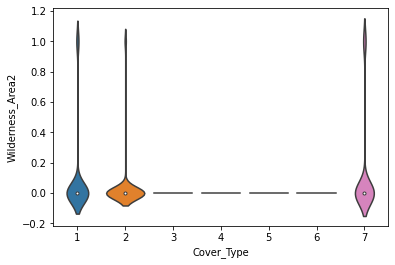

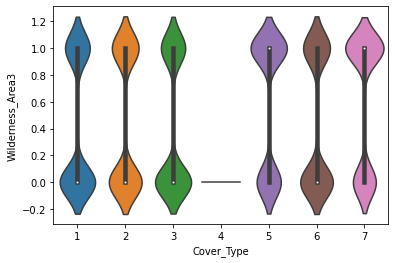

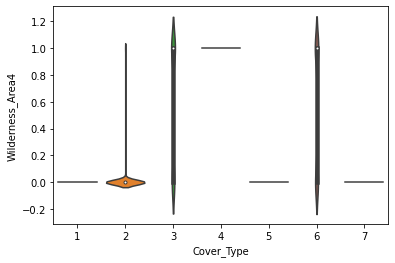

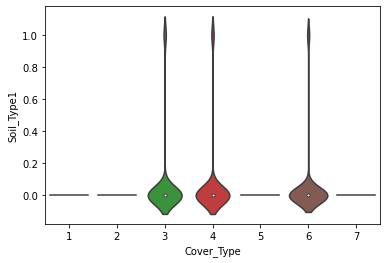

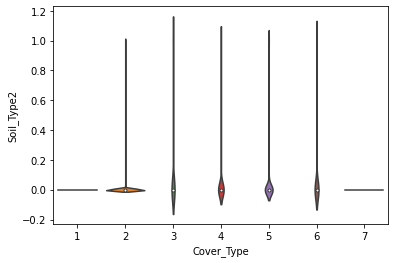

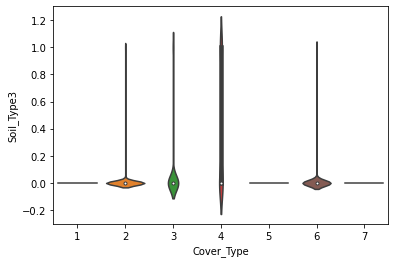

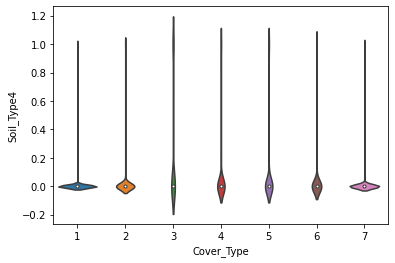

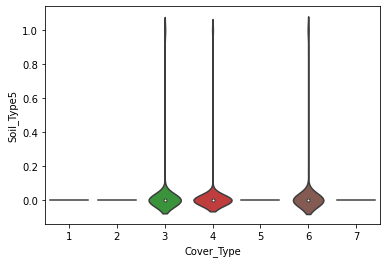

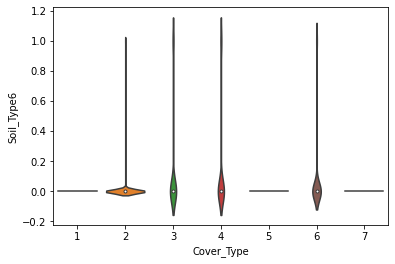

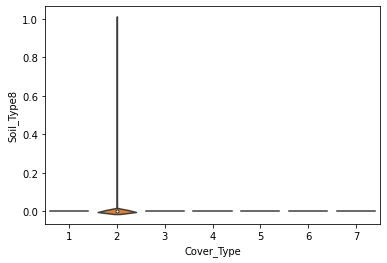

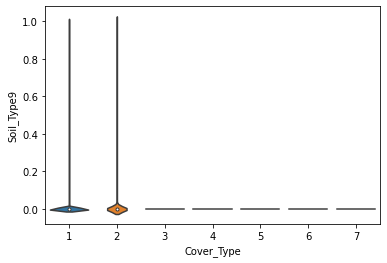

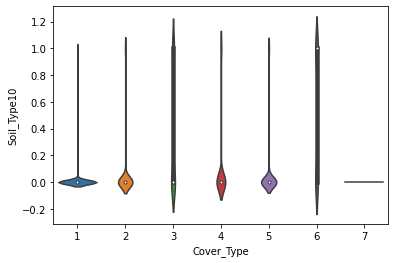

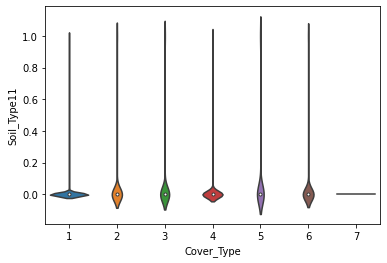

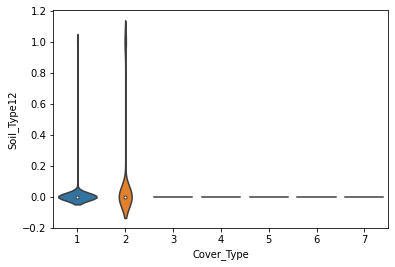

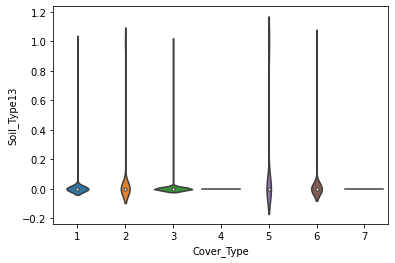

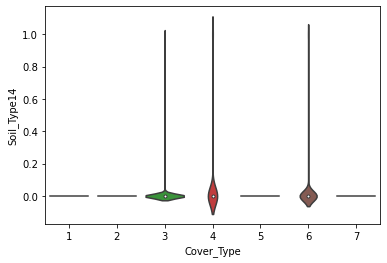

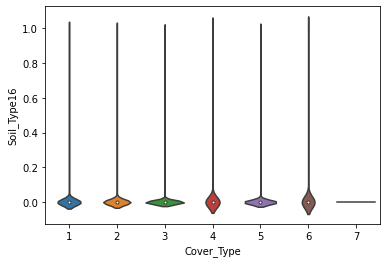

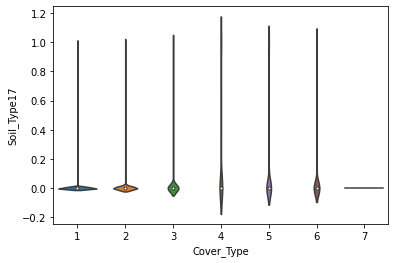

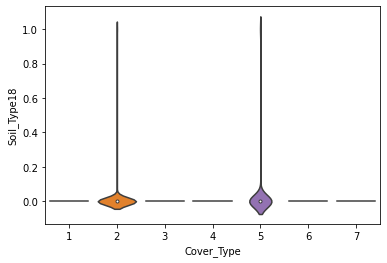

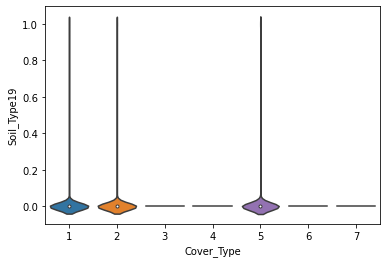

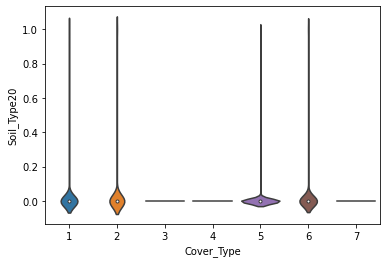

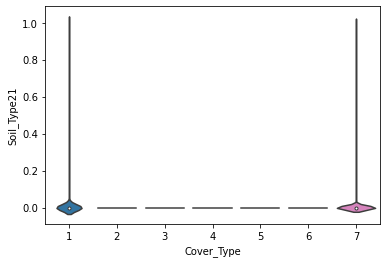

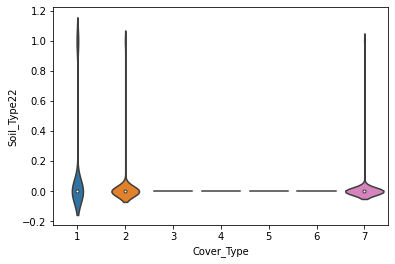

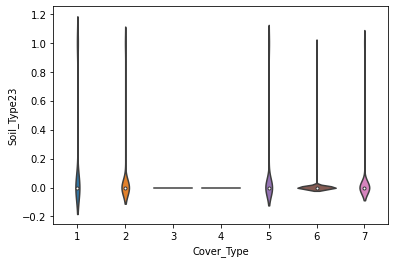

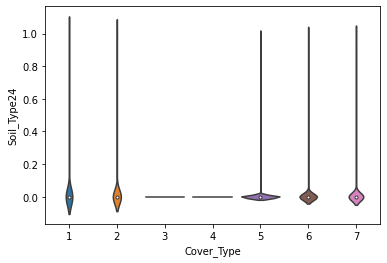

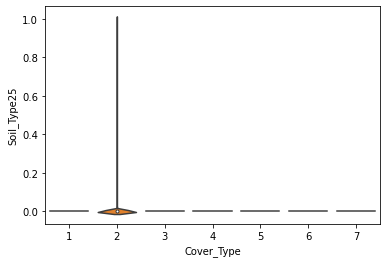

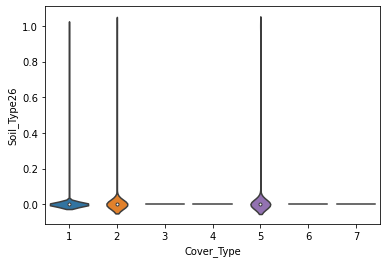

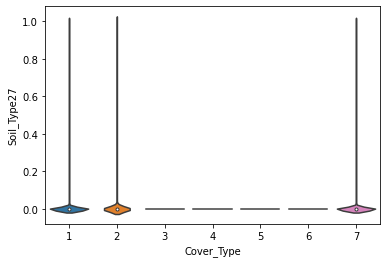

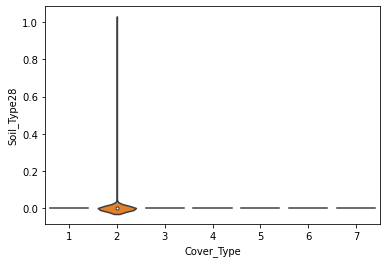

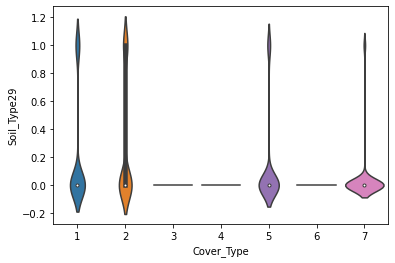

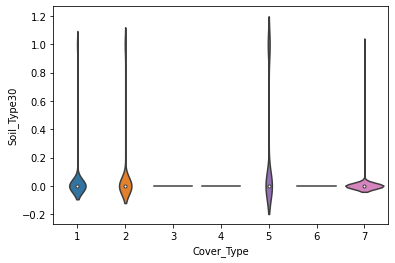

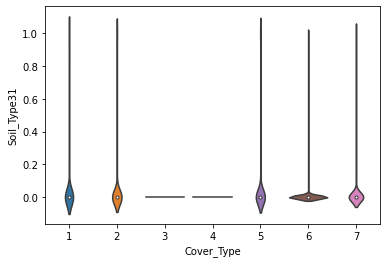

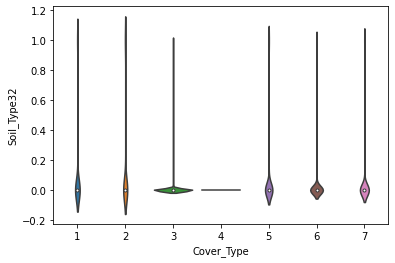

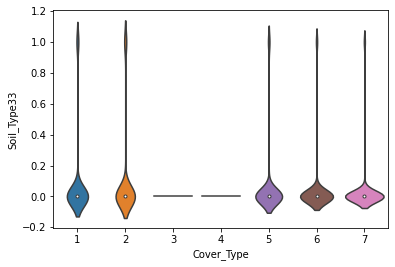

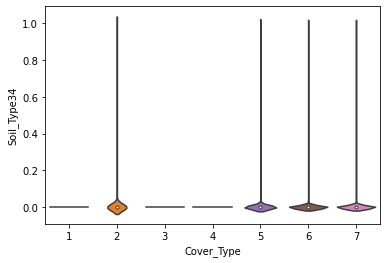

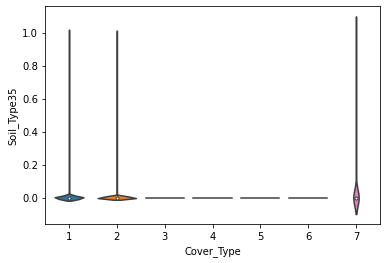

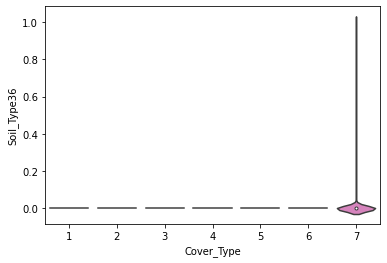

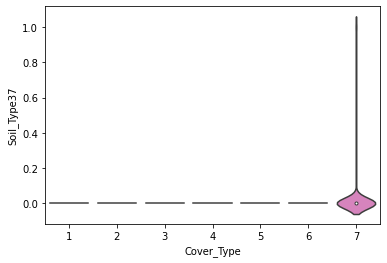

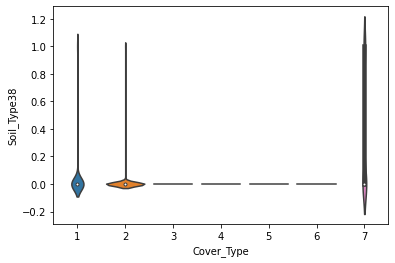

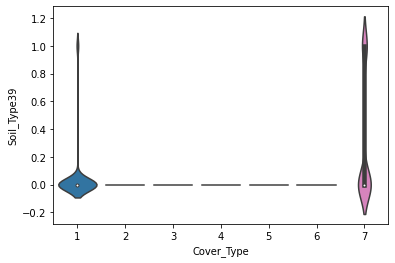

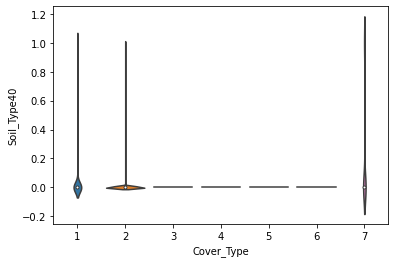

In [15]:
#Plotting violin plot between every feature and target

for i in range(0,len(train.columns)-1):
    sns.violinplot(data=train, x=train.iloc[:,-1], y=train[train.columns[i]])
    plt.show()

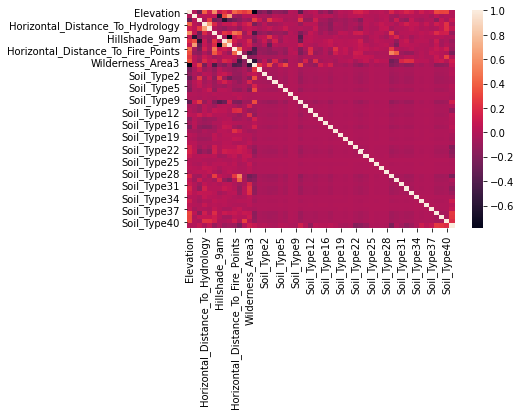

In [17]:
#plotting heatmap to check correlation
sns.heatmap(train.corr())

In [18]:
#Selecting upper and lower threshold
upper_threshold = 0.5
lower_threshold = -0.5

In [23]:
#List the correlation pairs
correlation = train.corr().unstack().sort_values(kind='quicksort')
correlation.head()

Elevation         Wilderness_Area4   -0.783816
Wilderness_Area4  Elevation          -0.783816
Hillshade_9am     Hillshade_3pm      -0.781940
Hillshade_3pm     Hillshade_9am      -0.781940
Slope             Hillshade_Noon     -0.610468
dtype: float64

In [25]:
#Select correlation pairs having correlation greater than upper threshold or lower than lower threshold

correlation_var_list = correlation[((correlation > upper_threshold) | (correlation < lower_threshold)) & (correlation != 1)]
print(correlation_var_list)

Elevation                         Wilderness_Area4                   -0.783816
Wilderness_Area4                  Elevation                          -0.783816
Hillshade_9am                     Hillshade_3pm                      -0.781940
Hillshade_3pm                     Hillshade_9am                      -0.781940
Slope                             Hillshade_Noon                     -0.610468
Hillshade_Noon                    Slope                              -0.610468
Hillshade_9am                     Aspect                             -0.593524
Aspect                            Hillshade_9am                      -0.593524
Wilderness_Area4                  Wilderness_Area3                   -0.567056
Wilderness_Area3                  Wilderness_Area4                   -0.567056
Wilderness_Area1                  Soil_Type29                         0.547484
Soil_Type29                       Wilderness_Area1                    0.547484
Elevation                         Horizontal_Distanc

### Feature Selection and Model building

- Separate the features and target and then split the train data into train and validation set.
- Apply different models of your choice and  then predict on the validation data and find the `accuracy_score` for this prediction.
- Try improving upon the `accuracy_score` using different feature selection techniques like wrapper methods, PCA and try using hyperparameter tuning to find the parameters that give the best accuracy.

In [28]:
# Code Starts here

#Split into features and target
X = train.iloc[:,:-1]
y = train.iloc[:,-1]

In [29]:
#Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [30]:
#Fitting Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=17, n_jobs=4)
rfe = RFE(model, 42)
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)
model.fit(X_train_rfe, y_train)
y_pred_rfe = model.predict(X_test_rfe)
print(accuracy_score(y_test, y_pred_rfe))

0.8380165289256198


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [31]:
# Code starts here

#Read test data
test = pd.read_csv('E:/GreyAtom/glab proj/Forest Type Cover Prediction/test.csv')
test.head()


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,6376,2707,28,5,240,8,30,218,230,148,708,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8962,3401,161,15,361,45,2881,234,242,135,1801,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,7122,2789,336,20,256,67,1731,172,209,174,1091,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,931,2942,350,9,242,33,5032,203,224,160,1838,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,3678,2311,22,23,127,48,1149,199,184,113,819,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test.drop(['Id','Soil_Type7','Soil_Type15'],1,inplace=True)

# Applying rfe on test data
test_rfe = rfe.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_rfe)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Cover_Type':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission1.csv',index=False)